# Week 9: Numerical Integration

<font size="6"> Laboratory 8 </font> <br>
<font size="3"> Last updated June 16, 2022 </font>

## <span style="color:orange;"> 00. Content </span>

<font size="5"> Mathematics </font>
- Numerical integration
- Error in numerical integration
    
<font size="5"> Programming Skills </font>
- Functions
    
<font size="5"> Embedded Systems </font>
- Thonny and MicroPython

## <span style="color:orange;"> 0. Required Hardware </span>
- Microcontroller: Raspberry Pi Pico
- Breadboard
- USB connector
- Accelerometer

<h3 style="background-color:lightblue"> Write your name and email below: </h3>

**Name:** me 

**Email:** me @purdue.edu

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## About the LSM9DS0

The LSM9DS0 accelerometers we've been using actually collect more data than we have been using. The chip has 3 sensors: an accelerometer to calculate linear acceleration in 3 directions, a gyroscope to measure angular velocity in 3 directions, and a magnetometer that measures the strength of magnetic fields in 3 direction.

In theory, since the gyroscope measure angular velocity in degrees per second, we could integrate the velocity data over time to find out the angle in each of the three directions. In other words, the gyroscope measures how fast the angle is changing so we can figure out the current angle of the gyroscope by adding up how much the angle changes times how much time has elapsed. What we've described is an integral:
$$ \theta(t) = \int_0^T \omega(t) dt, $$
where $\theta(t)$ is the angle and $\omega(t)$ is the angular velocity at time $t$.

In practice, we can't ignore the error in our data. At every time $t$, the gyroscope reading is the true value plus some error.
$$ \hat\theta(t) = \int_0^T (\omega(t)+\epsilon(t)) dt =  \theta(t) + \int_0^T \epsilon(t)dt. $$

### <span style="color:red"> Exercise </span>

Keep the gyroscope still for a few seconds and save the data to a `.txt` file. Plot the output of the 3 channel measurements with time as the independent variable and angular velocity in degrees/second as the dependent variable. 

<h3 style="background-color:lightblue"> Write Answers for Exercise Below </h3>

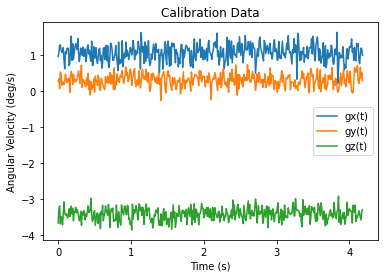

In [13]:
# solution
calibration = np.loadtxt('cal_gyro.txt')
offset = np.average(calibration,axis=0)
time_step = 0.01 #time between measurements
time = np.arange(len(calibration))*time_step

fig, ax = plt.subplots()
ax.plot(time, calibration)
ax.legend(['gx(t)','gy(t)','gz(t)'])
ax.set_title('Calibration Data')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angular Velocity (deg/s)')
plt.show()

We aren't moving the gyroscope so all of our reading should be about zero right? Ideally, yes, but our digital gyroscope uses tiny internal springs to measure rotation which are sensitive to temperature. In order to get meaningful data, we need to account for this offset.

### <span style="color:red"> Exercise </span>

Using the data you just collected, compute the mean value in each channel. Take a new still measurement for a few seconds, read it in, and subtract the offset. Plot your results.

<h3 style="background-color:lightblue"> Write Answers for Exercise Below </h3>

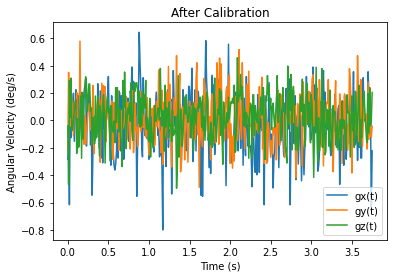

In [20]:
# solution 
offset = np.average(calibration,axis=0)

gyro = np.loadtxt('still_gyro.txt') - offset
time_step = 0.01 #time between measurements
time = np.arange(len(gyro))*time_step
fig, ax = plt.subplots()
ax.plot(time, gyro)
ax.legend(['gx(t)','gy(t)','gz(t)'])
ax.set_title('After Calibration')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angular Velocity (deg/s)')
plt.show()

### <span style="color:red"> Exercise </span>

Write 5 functions to compute the integral
$$\hat\theta(t) = \int_0^T (\omega(t)+\epsilon(t)) dt $$
according to 
- Left Riemann sum
- Right Riemann sum
- Midpoint Rule
- Trapezoid Rule
- Simpson's Rule

Plot all 5 curves on one graph, labeled clearly.

<h3 style="background-color:lightblue"> Write Answers for Exercise Below </h3>

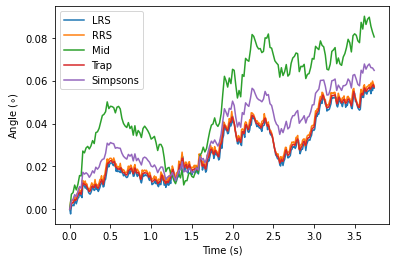

In [22]:
# solution
def left_riemann(ang_v):
    ang = np.zeros(len(ang_v))
    for t in range(1,len(ang_v)):
        ang[t] = ang[t-1] + ang_v[t-1]*time_step
    return ang

def right_riemann(ang_v):
    ang = np.zeros(len(ang_v))
    for t in range(1,len(ang_v)):
        ang[t] = ang[t-1] + ang_v[t]*time_step
    return ang

def midpoint(ang_v):
    ang = np.zeros( int(len(ang_v)/2)+1 )
    for t in np.arange(1,len(ang)):
        ang[t] = ang[t-1] + (ang_v[2*t-1])*2*time_step
    return ang

def trap(ang_v):
    ang = np.zeros(len(ang_v))
    for t in range(1,len(ang_v)):
        ang[t] = ang[t-1] + (ang_v[t]+ang_v[t-1])*0.5*time_step
    return ang

def simpsons(ang_v):
    ang = np.zeros( int(len(ang_v)/2)+1 )
    for t in np.arange(1,len(ang)):
        if t == 1:
            ang[t] = ang[t-1] + (ang_v[0]+4*ang_v[2*t-1]+ang_v[2*t])*time_step/3
        else:
            ang[t] = ang[t-1] + (ang_v[2*t-2]+4*ang_v[2*t-1]+ang_v[2*t])*time_step/3
    return ang

ang_v = gyro[:-1,1] # need this to be an even length
fig, ax = plt.subplots()
ax.plot(np.arange(len(ang_v))*time_step,left_riemann(ang_v), label='LRS')
ax.plot(np.arange(len(ang_v))*time_step,right_riemann(ang_v), label='RRS')
ax.plot((np.arange(len(ang_v))*time_step)[::2],midpoint(ang_v),label='Mid')
ax.plot(np.arange(len(ang_v))*time_step,trap(ang_v),label='Trap')
ax.plot((np.arange(len(ang_v))*time_step)[::2],simpsons(ang_v),label='Simpsons')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle ($\circ$)')
plt.show()

### <span style="color:red"> Exercise </span>

Previously we have used averaging to reduce measurement error in the accelerometer with the class `Averager`.
Using different lengths to average across, report how it affects drift. Justify what range of values you chose and present your results with clear plots and short explanations.

<h3 style="background-color:lightblue"> Write Answers for Exercise Below </h3>

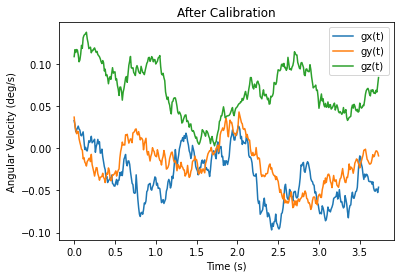

In [16]:
# partial solution
gyro = np.loadtxt('avged_gyro.txt',skiprows=50) - offset
time_step = 0.01 #time between measurements
time = np.arange(len(gyro))*time_step
fig, ax = plt.subplots()
ax.plot(time, gyro)
ax.legend(['gx(t)','gy(t)','gz(t)'])
ax.set_title('After Calibration')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angular Velocity (deg/s)')
plt.show()

## Error
Suppose $\theta(t)$ is continuous over $[0,T]$ and let 
$$
\begin{align*}
    M_1 &= \max_{t \in (0,T)} |\theta'(t)| \\
    M_2 &= \max_{t \in (0,T)} |\theta''(t)|
\end{align*}
$$
That is, $M_1$ is the maximum of the absolute value of the first derivative $\theta'(t)$ over the interval $(0,T)$ and $M_2$ is the maximum of the absolute value of the second derivative $\theta''(t)$ over the interval $(0,T)$. If we split the interval  $[0,T]$ into $n$ equal subintervals, then 
- the error in using either the left Riemann sum or right riemann sum is bounded by
    $$
    \text{Riemann Error} \leq \frac{M_1T^2}{2n}.
    $$
    
- the error in using the midpoint rule is bounded by
    $$
    \text{Midpoint Error} \leq \frac{M_2T^3}{24n^2}.
    $$
- the error in using the trapezoid rule is bounded by
    $$
    \text{Trapezoid Error} \leq \frac{M_2T^3}{12n^2}.
    $$
- the error in using Simpson's rule is bounded by
    $$
    \text{Simpson's Error} \leq \frac{M_2T^5}{180n^4}.
    $$

### <span style="color:red"> Exercise </span>

For each integration rule, use the error bound to determine a value for $n$ that ensures that the integration error is less than $0.1$. The value $n$ gives a better sampling frequency to use when collecting data. Implement the better sampling frequency and compare 

<h3 style="background-color:lightblue"> Write Answers for Exercise Below </h3>

### <span style="color:red"> Exercise </span>

The value of $n$ gives a better sampling frequency to use when collecting data. Implement the better sampling frequency (keeping time the same) and compare your new results to your original result.

<h3 style="background-color:lightblue"> Write Answers for Exercise Below </h3>

## Can We Remove Drift?

If we are only using gyroscope data, then unfortunately the answer is no. We have shown that there are ways to reduce drift but in any case, the error from integration will always be a factor in calculating angles. In practice, gyroscope data is usually combined with accelerometer data and/or magnetometer data to correct the drift or recalibrate over long periods of time. 


## <span style="color:green"> Reflection </span>

__1. What parts of the lab, if any, do you feel you did well? <br>
2. What are some things you learned today? <br>
3. Are there any topics that could use more clarification? <br>
4. Do you have any suggestions on parts of the lab to improve?__

<h3 style="background-color:lightblue"> Write Answers for the Reflection Below </h3>